<a href="https://colab.research.google.com/github/AvyayaJha/Data-Science-Research-Program/blob/main/Diamonds_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [32]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diamonds.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivam2503/diamonds",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
#another way to upload data (probably safer)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diamonds.csv')
df.head()

Saving diamonds.csv to diamonds (2).csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
df.info()
df.sample(5)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [37]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [38]:
df.columns = ['diamond id', 'carat', 'cut','color','clarity','depth percent','table','price','length','width','depth']
df.drop_duplicates(inplace = True)
df.columns

print(df['color'].unique())
df.head()

['E' 'I' 'J' 'H' 'F' 'G' 'D']


,diamond id,carat,cut,color,clarity,depth percent,table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
df['color'].unique() #order of color best --> worst: D, E, F, G, H, I, J

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [40]:
encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good','Premium','Ideal']]) #4 is best, 0 is worst
df['cut encoded'] = encoder.fit_transform(df[['cut']])

encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]) #7 is best, 0 is worst
df['clarity encoded'] = encoder.fit_transform(df[['clarity']])

encoder = OrdinalEncoder(categories=[['J','I','H','G','F','E','D']]) #6 is best, 0 is worst
df['color encoded'] = encoder.fit_transform(df[['color']])

df.drop(columns=['cut','clarity','color'],inplace = True) #drops categorical columns since encoded now
df.sample(10)


,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
33647,33648,0.32,62.8,60.0,834,4.32,4.34,2.72,2.0,6.0,4.0
38665,38666,0.33,62.3,55.0,1040,4.44,4.42,2.76,4.0,6.0,3.0
31199,31200,0.32,63.0,58.0,756,4.38,4.32,2.74,3.0,6.0,1.0
36916,36917,0.41,60.2,59.0,961,4.84,4.79,2.90,3.0,4.0,3.0
4294,4295,0.82,61.8,55.0,3588,5.97,6.01,3.70,4.0,2.0,5.0
14911,14912,1.07,60.2,55.0,6002,6.64,6.68,4.01,2.0,2.0,6.0
25863,25864,2.08,62.3,58.0,14947,8.18,8.13,5.08,3.0,1.0,1.0
14067,14068,0.30,62.6,57.0,605,4.27,4.29,2.68,4.0,4.0,3.0
29379,29380,0.31,63.3,55.0,698,4.35,4.31,2.74,2.0,2.0,5.0
7897,7898,1.00,65.1,57.0,4312,6.27,6.23,4.07,0.0,5.0,2.0


In [41]:
df.describe() #there are some length, width, and depth values that are 0 which doesn't make sense

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097,3.051020,3.405803
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000,5.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,7.000000,6.000000


<Axes: >

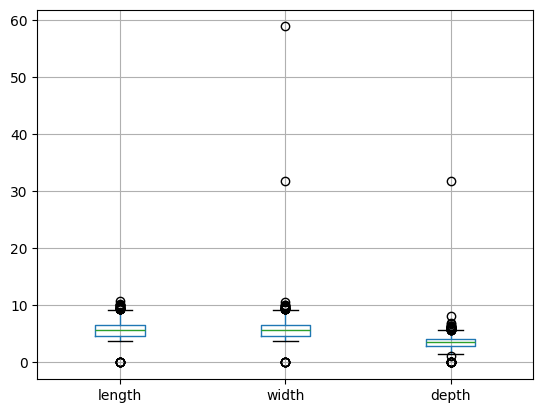

In [42]:
df.boxplot(['length','width','depth']) #box plots show that values past 30 skew the data immensely

In [43]:
#drop the values of length, width, and depth that don't make sense and skew the data (=0 or >30)
#inplace = True reassigns 'df' to correct values.
df.drop(df[(df['length'] < 0.001) | (df['length'] > 30)].index, inplace=True)
df.drop(df[(df['width'] < 0.001) | (df['width'] > 30)].index, inplace=True)
df.drop(df[(df['depth'] < 0.001) | (df['depth'] > 30)].index, inplace=True)

df.describe() #doesn't affect encoded variables much

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,26971.599904,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409,2.904223,3.051505,3.405939
std,15571.129462,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620,1.116593,1.647017,1.701281
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000
25%,13487.000000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,26973.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,3.000000
75%,40456.000000,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000,4.000000,4.000000,5.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000,4.000000,7.000000,6.000000


<Axes: >

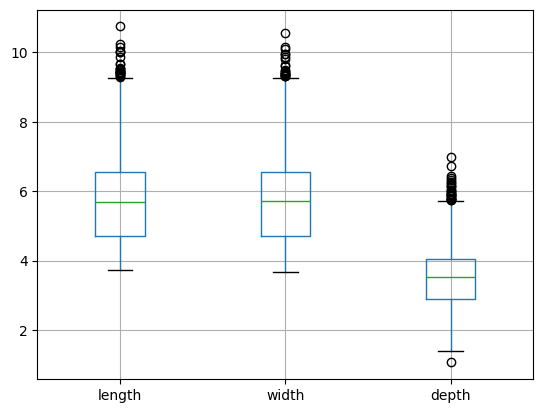

In [44]:
df.boxplot(['length','width','depth'])

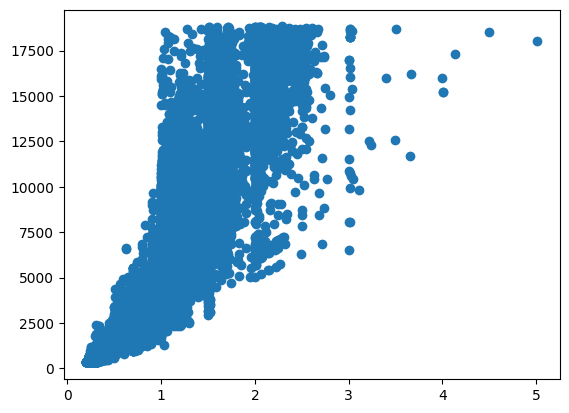

In [45]:
plt.scatter(df['carat'],df['price'])

In [46]:
df.corr()

#ASK MENTOR: how is cut,clarity, and color negativly coorelated to price, and why so weak?
#POSSIBLE QUESTION: why is this the case, is it due to ordinal encoding?

#looks like for price: carat, length, width, and depth are the most coorelated.
#proabably can drop width and depth since length, width, and depth are so coorelated and having all is redundant

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
diamond id,1.000000,-0.378172,-0.035069,-0.100819,-0.307085,-0.406330,-0.407242,-0.409204,0.096584,0.208581,0.095016
carat,-0.378172,1.000000,0.028357,0.181646,0.921586,0.977778,0.976860,0.976478,-0.134966,-0.352716,-0.291326
depth percent,-0.035069,0.028357,1.000000,-0.295758,-0.010653,-0.024940,-0.028075,0.096741,-0.218081,-0.067508,-0.047407
table,-0.100819,0.181646,-0.295758,1.000000,0.127241,0.196096,0.189942,0.155904,-0.433322,-0.160243,-0.026445
price,-0.307085,0.921586,-0.010653,0.127241,1.000000,0.887221,0.888818,0.882107,-0.053497,-0.146741,-0.172394
length,-0.406330,0.977778,-0.024940,0.196096,0.887221,1.000000,0.998657,0.991077,-0.126242,-0.372830,-0.270638
width,-0.407242,0.976860,-0.028075,0.189942,0.888818,0.998657,1.000000,0.990730,-0.125870,-0.367494,-0.270447
depth,-0.409204,0.976478,0.096741,0.155904,0.882107,0.991077,0.990730,1.000000,-0.152468,-0.376418,-0.274934
cut encoded,0.096584,-0.134966,-0.218081,-0.433322,-0.053497,-0.126242,-0.125870,-0.152468,1.000000,0.189160,0.020516
clarity encoded,0.208581,-0.352716,-0.067508,-0.160243,-0.146741,-0.372830,-0.367494,-0.376418,0.189160,1.000000,-0.025824


<Axes: >

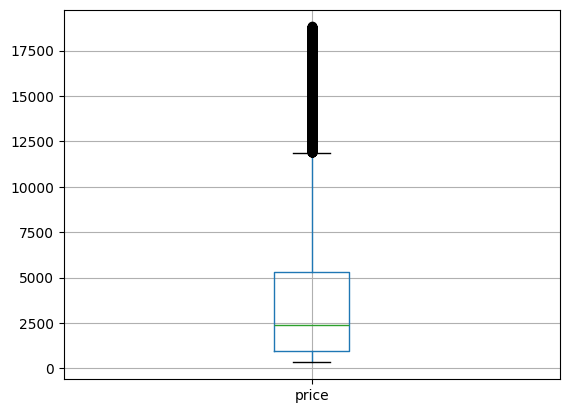

In [47]:
df.boxplot('price') #boxplot shows that price is very wide, will remove outliers of IQR *1.5 (>q3 or <q1)

MY RESEARCH QUESTION CURRENTLY: WHICH DIAMOND FEATURES ARE MOST IMPORTANT FOR PRICE AND HOW CAN WE USE THOSE TO PREDICT PRICING?

In [48]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print("10. Detecting Outliers:")

outliers.info() #505 outliers in dataframe
df = df[~((df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR))]
df

10. Detecting Outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 23820 to 27749
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diamond id       3531 non-null   int64  
 1   carat            3531 non-null   float64
 2   depth percent    3531 non-null   float64
 3   table            3531 non-null   float64
 4   price            3531 non-null   int64  
 5   length           3531 non-null   float64
 6   width            3531 non-null   float64
 7   depth            3531 non-null   float64
 8   cut encoded      3531 non-null   float64
 9   clarity encoded  3531 non-null   float64
 10  color encoded    3531 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 331.0 KB


,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,5.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,5.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,1.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,4.0,2.0,6.0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,6.0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,6.0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,3.0,1.0,2.0


<Axes: >

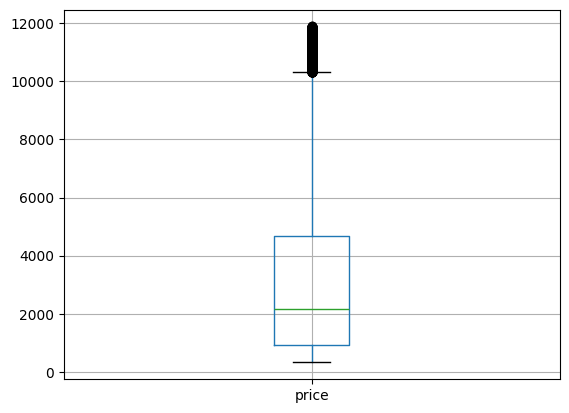

In [49]:
df.boxplot('price')

In [50]:
df = df.drop(columns = 'diamond id') #not needed

In [51]:
df.corr() #seems like removing ouliers still doesn't improve coorelation for cut, clarity, and color

,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
carat,1.000000,0.046520,0.183594,0.915872,0.982623,0.981435,0.981404,-0.162432,-0.376931,-0.267181
depth percent,0.046520,1.000000,-0.291911,0.004170,-0.015886,-0.019368,0.117372,-0.222000,-0.070594,-0.052011
table,0.183594,-0.291911,1.000000,0.128096,0.194015,0.187093,0.150196,-0.435506,-0.160172,-0.017089
price,0.915872,0.004170,0.128096,1.000000,0.897484,0.899241,0.891834,-0.074698,-0.156241,-0.149001
length,0.982623,-0.015886,0.194015,0.897484,1.000000,0.998343,0.989295,-0.144071,-0.389560,-0.243942
width,0.981435,-0.019368,0.187093,0.899241,0.998343,1.000000,0.988875,-0.143458,-0.383766,-0.243791
depth,0.981404,0.117372,0.150196,0.891834,0.989295,0.988875,1.000000,-0.173082,-0.392973,-0.249017
cut encoded,-0.162432,-0.222000,-0.435506,-0.074698,-0.144071,-0.143458,-0.173082,1.000000,0.192123,0.020857
clarity encoded,-0.376931,-0.070594,-0.160172,-0.156241,-0.389560,-0.383766,-0.392973,0.192123,1.000000,-0.046871
color encoded,-0.267181,-0.052011,-0.017089,-0.149001,-0.243942,-0.243791,-0.249017,0.020857,-0.046871,1.000000


Below are some data visualizations now that dataframe is mostly filtered

Text(0, 0.5, 'price')

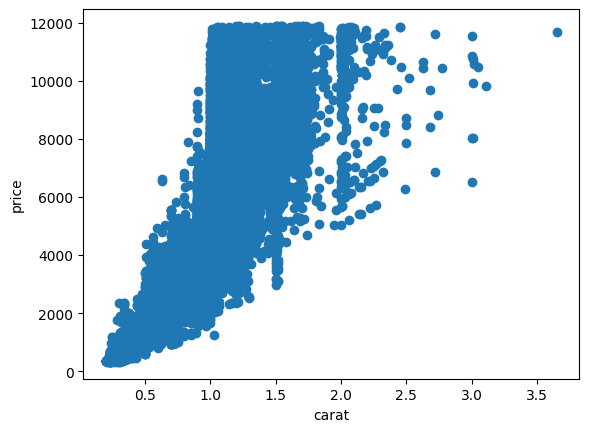

In [52]:
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')

Text(0, 0.5, 'price')

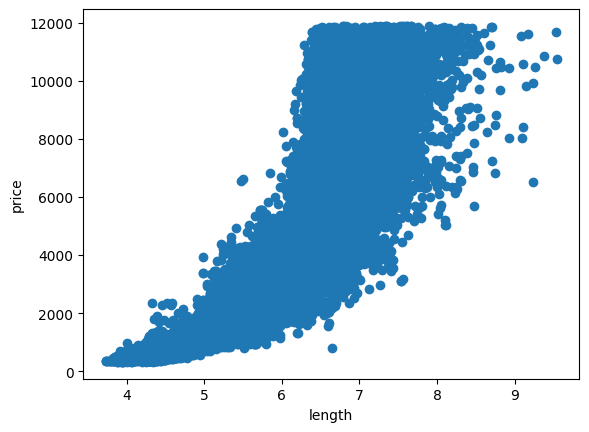

In [53]:
plt.scatter(df['length'],df['price'])
plt.xlabel('length')
plt.ylabel('price')

<Axes: >

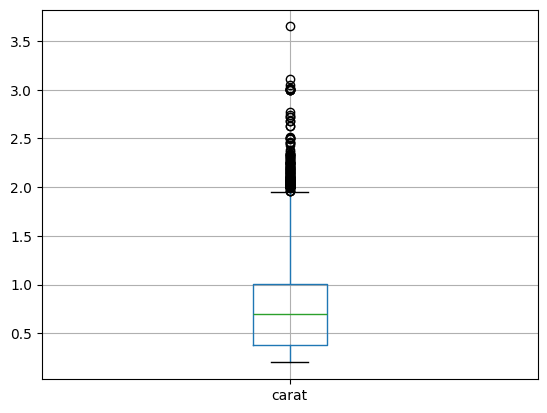

In [54]:
df.boxplot('carat')

Text(0.5, 1.0, 'price vs enteries')

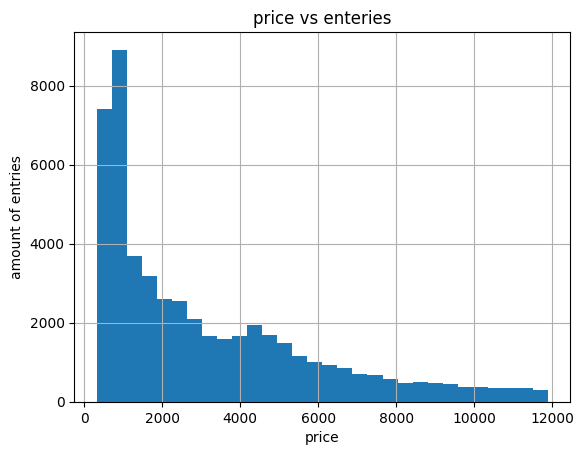

In [55]:
df['price'].hist(bins=30)
plt.xlabel('price')
plt.ylabel('amount of entries')
plt.title('price vs enteries')


UPDATED RESEARCH QUESTION: WHY IS THE COORELATION OF CUT, CLARITY, AND COLOR SO POOR WHEN PREDICTING PRICING AND HOW CAN DIFFERENT ENCODING MODELS BE USED TO IMPROVE THIS?

* see coorelation through visualizations
* use different feature encoding teqniches: ordinal, label, One-Hot, Dummy
* create linear regression models for clarity, cut, and color for each encoding method to show how poor they are at predicting target (pricing) compared with a similar model with features: carat and length to show immense difference




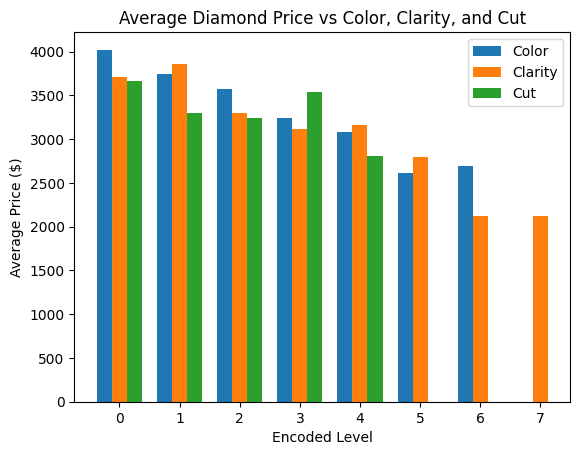

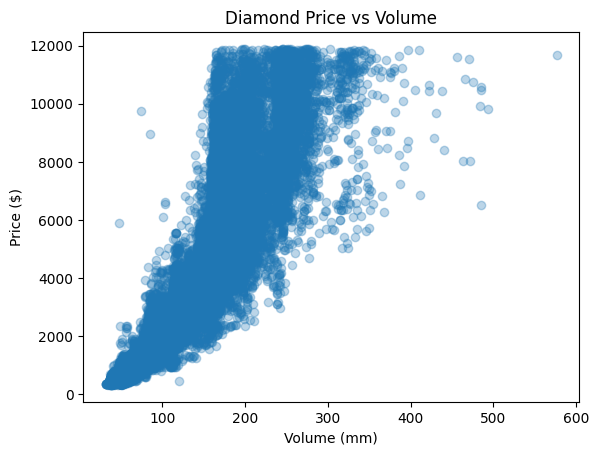

In [56]:
#LIGHTNING TALK CODE/VISUALIZATIONS
avg_clarity_price= df.groupby('clarity encoded')['price'].mean()
avg_color_price= df.groupby('color encoded')['price'].mean()
avg_cut_price= df.groupby('cut encoded')['price'].mean()


plt.bar(avg_color_price.index-0.25,avg_color_price, width = 0.25, label = 'Color')
plt.bar(avg_clarity_price.index,avg_clarity_price, width = 0.25, label = "Clarity")
plt.bar(avg_cut_price.index + 0.25,avg_cut_price, width = 0.25, label = 'Cut')

plt.legend()
plt.xlabel('Encoded Level')
plt.ylabel('Average Price ($)')
plt.title('Average Diamond Price vs Color, Clarity, and Cut')
plt.show()

df['volume'] = df['length'] * df['width'] * df['depth']
plt.scatter(df['volume'],df['price'], alpha = 0.3)
plt.xlabel('Volume (mm)')
plt.ylabel('Price ($)')
plt.title('Diamond Price vs Volume')
plt.show()






(array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 1., 1., 0., 1.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([1.46562000e+03, 5.72694516e+06, 1.14524247e+07, 1.71779042e+07,
        2.29033838e+07, 2.86288633e+07, 3.43543428e+07, 4.00798224e+07,
        4.58053019e+07, 5.15307815e+07, 5.72562610e+07]),
 <a list of 10 BarContainer objects>)

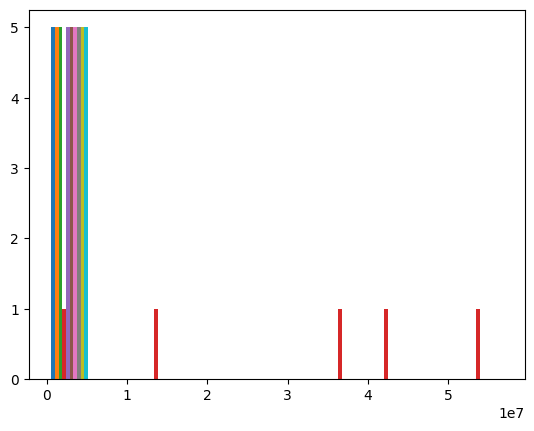

In [62]:
cut_total= df.groupby('cut encoded').sum()
plt.hist(cut_total)